In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [1]:
data_paths = [
    "../../data/mlm/windows/five_prime_UTR.test/512/128/seqs.txt",
    "../../data/mlm/windows/three_prime_UTR.test/512/128/seqs.txt",
    "../../data/mlm/windows/CDS.test/512/128/seqs.txt",
    "../../data/mlm/windows/val_all/512/256/seqs.txt",
    "../../data/mlm/windows/val/512/256/seqs.txt",
]
model_paths = [
    "results_512_convnet/checkpoint-1000000",
    "results_512_convnet_ftAth_alone/checkpoint-100000",
    "results_512_convnet_ftAth_alone/checkpoint-500000",
    "results_512_convnet_ftAth_alone/checkpoint-1000000",
]

In [4]:
rows = []
for data_path in data_paths:
    for model_path in model_paths:
        path = f"results/perplexity/{data_path.replace('/', '_')}/{model_path.replace('/', '_')}/perplexity.txt"
        perplexity = float(np.loadtxt(path))
        rows.append([data_path, model_path, perplexity])
df = pd.DataFrame(rows, columns=["data_path", "model_path", "perplexity"])
df

,data_path,model_path,perplexity
0,../../data/mlm/windows/five_prime_UTR.test/512...,results_512_convnet/checkpoint-1000000,3.239057
1,../../data/mlm/windows/five_prime_UTR.test/512...,results_512_convnet_ftAth_alone/checkpoint-100000,3.217446
2,../../data/mlm/windows/five_prime_UTR.test/512...,results_512_convnet_ftAth_alone/checkpoint-500000,3.216599
3,../../data/mlm/windows/five_prime_UTR.test/512...,results_512_convnet_ftAth_alone/checkpoint-100...,3.210004
4,../../data/mlm/windows/three_prime_UTR.test/51...,results_512_convnet/checkpoint-1000000,3.361449
5,../../data/mlm/windows/three_prime_UTR.test/51...,results_512_convnet_ftAth_alone/checkpoint-100000,3.344506
6,../../data/mlm/windows/three_prime_UTR.test/51...,results_512_convnet_ftAth_alone/checkpoint-500000,3.341941
7,../../data/mlm/windows/three_prime_UTR.test/51...,results_512_convnet_ftAth_alone/checkpoint-100...,3.337119
8,../../data/mlm/windows/CDS.test/512/128/seqs.txt,results_512_convnet/checkpoint-1000000,3.278875
9,../../data/mlm/windows/CDS.test/512/128/seqs.txt,results_512_convnet_ftAth_alone/checkpoint-100000,3.260254


In [5]:
df.loc[df.model_path=="results_512_convnet/checkpoint-1000000", "steps"] = 0
df.loc[df.model_path=="results_512_convnet_ftAth_alone/checkpoint-100000", "steps"] = 100000
df.loc[df.model_path=="results_512_convnet_ftAth_alone/checkpoint-500000", "steps"] = 500000
df.loc[df.model_path=="results_512_convnet_ftAth_alone/checkpoint-1000000", "steps"] = 1000000

In [8]:
df.loc[df.data_path.str.contains("five_prime_UTR"), "Region"] = "5' UTR"
df.loc[df.data_path.str.contains("three_prime_UTR"), "Region"] = "3' UTR"
df.loc[df.data_path.str.contains("CDS"), "Region"] = "CDS"
df.loc[df.data_path.str.contains("val_all"), "Region"] = "All"
df.loc[df.data_path.str.contains("val/"), "Region"] = "All (no repeats)"

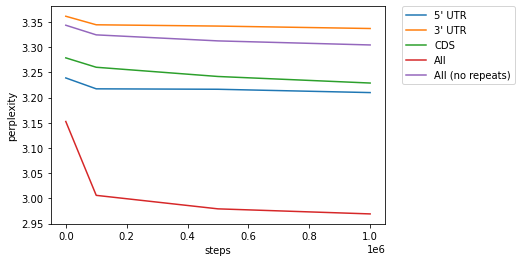

In [12]:
sns.lineplot(
    data=df,
    x="steps",
    y="perplexity",
    hue="Region",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);